# Descriptive Analytics: Numerical Summary
By Eli Yi-Liang Tung

Department of Analytics and Operations, Business School, NUS

## Learning Objectives
1. Use Pandas to obtain and interpret summary statistics.
2. Slice and dice data by using group-wise operations using aggregate, filter and apply functions in Pandas
3. Learn how to combine different data sets using Pandas' Concat and Merge

## Descriptive Measures
**Descriptive analytics** creates a summary of historical data to yield useful information and possibly prepare the data for further analysis. Such information may include some basic descriptive measures of data and graphs showing important insights.

### Centers, variations, and extreme points
The center of data is usually expressed by the mean value of the median, which can be easily achieved by the corresponding methods.

In [1]:
import pandas as pd

In [2]:
data_dict = {'wage': [3.10, 3.24, 3.00, 6.00, 5.30, 8.75],
             'educ': [11.0, 12.0, 11.0, 8.0, 12.0, 16.0],
             'exper': [2.0, 22.0, 2.0, 44.0, 7.0, 9.0],
             'female': [1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
             'married': [0.0, 1.0, 0.0, 1.0, 1.0, 1.0]}

data = pd.DataFrame(data_dict)    # DataFrame constructor
data                              # Display the DataFrame

,wage,educ,exper,female,married
0,3.10,11.0,2.0,1.0,0.0
1,3.24,12.0,22.0,1.0,1.0
2,3.00,11.0,2.0,0.0,0.0
3,6.00,8.0,44.0,0.0,1.0
4,5.30,12.0,7.0,0.0,1.0
5,8.75,16.0,9.0,0.0,1.0


In [3]:
data.mean()          # Mean value of each column

wage        4.898333
educ       11.666667
exper      14.333333
female      0.333333
married     0.666667
dtype: float64

In [4]:
type(data.mean())  # Show the data type of the results

pandas.core.series.Series

In [5]:
data.median()        # Median value of each column

wage        4.27
educ       11.50
exper       8.00
female      0.00
married     1.00
dtype: float64

In [6]:
type(data.median())  # Show the data type of the results

pandas.core.series.Series

Please note that the mean value of each column is stored in a <code>pandas.Series</code>, where the index labels are variable names, rather than a sequence of integers. 

Also notice that in the case of the 0-1 categorical variable "female", the mean value of 0.333 is the proportion of observations in the dataset labeled as "female". The same concept can be applied to the variable "married" as well.

Similarly, the measures of standard deviations and variances can be calculated by the corresponding methods.

In [7]:
data.std()         # Sample Standard deviation of each column

wage        2.271479
educ        2.581989
exper      16.280868
female      0.516398
married     0.516398
dtype: float64

In [8]:
data.var()         # Sample Variance of each column

wage         5.159617
educ         6.666667
exper      265.066667
female       0.266667
married      0.266667
dtype: float64

The maximum and minimum points in the dataset can also be found.

In [9]:
data.max()         # Maximum value of each column

wage        8.75
educ       16.00
exper      44.00
female      1.00
married     1.00
dtype: float64

In [10]:
data.min()         # Minimum value of each column

wage       3.0
educ       8.0
exper      2.0
female     0.0
married    0.0
dtype: float64

### Method <code>describe</code>

For <code>pandas.DataFrame</code> and <code>pandas.Series</code>, the method <code>describe</code> is a convenient tool to summarize some key measures altogether.

In [11]:
wage_summary = data.describe()  # Obtain the key descriptive measures 
wage_summary                    # Display these measures as a table

,wage,educ,exper,female,married
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.898333,11.666667,14.333333,0.333333,0.666667
std,2.271479,2.581989,16.280868,0.516398,0.516398
min,3.000000,8.000000,2.000000,0.000000,0.000000
25%,3.135000,11.000000,3.250000,0.000000,0.250000
50%,4.270000,11.500000,8.000000,0.000000,1.000000
75%,5.825000,12.000000,18.750000,0.750000,1.000000
max,8.750000,16.000000,44.000000,1.000000,1.000000


The variable <code>wage_summary</code> is a <code>pandas.DataFrame</code> table where the index labels are the names of the descriptive measures. 

Note that rows <code>25%</code>, <code>50%</code>, and <code>75%</code> represent the first (Q1), second(Q2), and third quartiles(Q3), respectively. The value Q3 - Q1 is called the interquartile range (IQR). 

<img src="http://www.brainfuse.com/quizUpload/c_83740/quartiles2.gif" width=450>

Besides methods mentioned above, Pandas has many other methods available for you to calculate descriptive measures via one line of code. You may check [Essential Basic Functionality¶](https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

## Sort data
For numerical data, sorting in ascending order is important to help understand percentile values of the data. In Pandas, we have a useful method to sort values in a DataFrame or Series. The Pandas’ method is `sort_values`

In [12]:
data.sort_values(by = 'wage', ascending = False)

,wage,educ,exper,female,married
5,8.75,16.0,9.0,0.0,1.0
3,6.00,8.0,44.0,0.0,1.0
4,5.30,12.0,7.0,0.0,1.0
1,3.24,12.0,22.0,1.0,1.0
0,3.10,11.0,2.0,1.0,0.0
2,3.00,11.0,2.0,0.0,0.0


In [13]:
data

,wage,educ,exper,female,married
0,3.10,11.0,2.0,1.0,0.0
1,3.24,12.0,22.0,1.0,1.0
2,3.00,11.0,2.0,0.0,0.0
3,6.00,8.0,44.0,0.0,1.0
4,5.30,12.0,7.0,0.0,1.0
5,8.75,16.0,9.0,0.0,1.0


In [14]:
data.sort_values(by = ['married','wage'], ascending = [False,True])

,wage,educ,exper,female,married
1,3.24,12.0,22.0,1.0,1.0
4,5.30,12.0,7.0,0.0,1.0
3,6.00,8.0,44.0,0.0,1.0
5,8.75,16.0,9.0,0.0,1.0
2,3.00,11.0,2.0,0.0,0.0
0,3.10,11.0,2.0,1.0,0.0


In [15]:
data

,wage,educ,exper,female,married
0,3.10,11.0,2.0,1.0,0.0
1,3.24,12.0,22.0,1.0,1.0
2,3.00,11.0,2.0,0.0,0.0
3,6.00,8.0,44.0,0.0,1.0
4,5.30,12.0,7.0,0.0,1.0
5,8.75,16.0,9.0,0.0,1.0


In [16]:
data.sort_values(by = ['married','wage'], ascending = [False,True], inplace = True)

In [17]:
data

,wage,educ,exper,female,married
1,3.24,12.0,22.0,1.0,1.0
4,5.30,12.0,7.0,0.0,1.0
3,6.00,8.0,44.0,0.0,1.0
5,8.75,16.0,9.0,0.0,1.0
2,3.00,11.0,2.0,0.0,0.0
0,3.10,11.0,2.0,1.0,0.0


## Group-wise Operations in Pandas

<i><b>Background</b></i>: In the following, we will use Singapore’s 4-Digits data set to exemplify the power of group-wise operations using Pandas. The 4-Digits (abbreviation: 4-D) is a lottery in Singapore. Individuals play by choosing any number from `0000` to `9999`. Then, twenty-three winning numbers are drawn each time. If one of the numbers matches the one that the player has bought, a prize is won. A draw is conducted to select these winning numbers. 4-Digits is a fixed-odds game. There are five prize categories: **1st Prize**, **2nd Prize**, **3rd Prize**, **Starter Prizes** and **Consolation Prizes**. We would like to know prize-specific summary of the 4-D lottery. 

### Load data

The following data file "4D_results_long.csv" has been generated. First, please load data into Python.

In [18]:
data = pd.read_csv('4D_results_long.csv')

In [19]:
data.head(10)

,draw_no,date,querystring,weekday,year,week_no,prize,number,prize_type
0,4323,2018-09-30,sppl=RHJhd051bWJlcj00MzIz,Sun,2018,39,first_prize,1646,1st
1,4322,2018-09-29,sppl=RHJhd051bWJlcj00MzIy,Sat,2018,38,first_prize,1490,1st
2,4321,2018-09-26,sppl=RHJhd051bWJlcj00MzIx,Wed,2018,38,first_prize,3141,1st
3,4320,2018-09-23,sppl=RHJhd051bWJlcj00MzIw,Sun,2018,38,first_prize,5917,1st
4,4319,2018-09-22,sppl=RHJhd051bWJlcj00MzE5,Sat,2018,37,first_prize,7338,1st
5,4318,2018-09-19,sppl=RHJhd051bWJlcj00MzE4,Wed,2018,37,first_prize,939,1st
6,4317,2018-09-16,sppl=RHJhd051bWJlcj00MzE3,Sun,2018,37,first_prize,7127,1st
7,4316,2018-09-15,sppl=RHJhd051bWJlcj00MzE2,Sat,2018,36,first_prize,3444,1st
8,4315,2018-09-12,sppl=RHJhd051bWJlcj00MzE1,Wed,2018,36,first_prize,4281,1st
9,4314,2018-09-09,sppl=RHJhd051bWJlcj00MzE0,Sun,2018,36,first_prize,4185,1st


In [20]:
data.shape

(10810, 9)

### Column Summary

#### value_counts()

In [21]:
# count the instances of each prize type
data['prize_type'].value_counts()

consolation    4700
starter        4700
1st             470
2nd             470
3rd             470
Name: prize_type, dtype: int64

In [22]:
# show the Top 10 most frequent winning number in the dataset
data['number'].value_counts().head(10)

7532    8
5788    7
9331    6
1289    6
9532    6
3442    6
9306    6
3509    6
5228    6
8304    6
Name: number, dtype: int64

#### describe()

In [23]:
# summary statistics of all the winning numbers
data['number'].describe()

count    10810.000000
mean      4957.073636
std       2905.037198
min          0.000000
25%       2400.250000
50%       4964.000000
75%       7479.750000
max       9999.000000
Name: number, dtype: float64

In [24]:
# summary of a categorical variable
data['weekday'].describe()

count     10810
unique        3
top         Sat
freq       3611
Name: weekday, dtype: object

### GroupBy

#### create a GroupBy object

In [25]:
data_by_prizetype = data.groupby(['prize_type'])

In [26]:
data_by_prizetype

#### GroupBy object attributes

In [27]:
data_by_prizetype.size()

prize_type
1st             470
2nd             470
3rd             470
consolation    4700
starter        4700
dtype: int64

In [28]:
#DataFrame column selection in GroupBy
data_by_prizetype['number']

In [29]:
data_by_prizetype[['number']]

In [30]:
data_by_prizetype.groups

{'1st': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             460, 461, 462, 463, 464, 465, 466, 467, 468, 469],
            dtype='int64', length=470),
 '2nd': Int64Index([470, 471, 472, 473, 474, 475, 476, 477, 478, 479,
             ...
             930, 931, 932, 933, 934, 935, 936, 937, 938, 939],
            dtype='int64', length=470),
 '3rd': Int64Index([ 940,  941,  942,  943,  944,  945,  946,  947,  948,  949,
             ...
             1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409],
            dtype='int64', length=470),
 'consolation': Int64Index([ 6110,  6111,  6112,  6113,  6114,  6115,  6116,  6117,  6118,
              6119,
             ...
             10800, 10801, 10802, 10803, 10804, 10805, 10806, 10807, 10808,
             10809],
            dtype='int64', length=4700),
 'starter': Int64Index([1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419,
             ...
             6100, 6101, 6102, 6103, 610

In [31]:
# Selecting a group
data_by_prizetype.get_group('2nd').head(10)

,draw_no,date,querystring,weekday,year,week_no,prize,number,prize_type
470,4323,2018-09-30,sppl=RHJhd051bWJlcj00MzIz,Sun,2018,39,second_prize,8122,2nd
471,4322,2018-09-29,sppl=RHJhd051bWJlcj00MzIy,Sat,2018,38,second_prize,4593,2nd
472,4321,2018-09-26,sppl=RHJhd051bWJlcj00MzIx,Wed,2018,38,second_prize,764,2nd
473,4320,2018-09-23,sppl=RHJhd051bWJlcj00MzIw,Sun,2018,38,second_prize,2345,2nd
474,4319,2018-09-22,sppl=RHJhd051bWJlcj00MzE5,Sat,2018,37,second_prize,7494,2nd
475,4318,2018-09-19,sppl=RHJhd051bWJlcj00MzE4,Wed,2018,37,second_prize,5409,2nd
476,4317,2018-09-16,sppl=RHJhd051bWJlcj00MzE3,Sun,2018,37,second_prize,6211,2nd
477,4316,2018-09-15,sppl=RHJhd051bWJlcj00MzE2,Sat,2018,36,second_prize,9074,2nd
478,4315,2018-09-12,sppl=RHJhd051bWJlcj00MzE1,Wed,2018,36,second_prize,3577,2nd
479,4314,2018-09-09,sppl=RHJhd051bWJlcj00MzE0,Sun,2018,36,second_prize,2622,2nd


In [32]:
# Iterating through groups
for name, group in data_by_prizetype:
    print(name)
    print(group.shape)
    print(type(group))

1st
(470, 9)
<class 'pandas.core.frame.DataFrame'>
2nd
(470, 9)
<class 'pandas.core.frame.DataFrame'>
3rd
(470, 9)
<class 'pandas.core.frame.DataFrame'>
consolation
(4700, 9)
<class 'pandas.core.frame.DataFrame'>
starter
(4700, 9)
<class 'pandas.core.frame.DataFrame'>


### Aggregation

#### Mean of winning numbers for each prizetype

In [33]:
# as series
data_by_prizetype['number'].mean()

prize_type
1st            4996.627660
2nd            5003.395745
3rd            4904.921277
consolation    4921.029362
starter        4989.745532
Name: number, dtype: float64

In [34]:
# as dataframe with the group variable as index
data_by_prizetype[['number']].mean()

,number
prize_type,
1st,4996.627660
2nd,5003.395745
3rd,4904.921277
consolation,4921.029362
starter,4989.745532


In [35]:
# as dataframe without index
data_by_prizetype[['number']].mean().reset_index()

,prize_type,number
0,1st,4996.627660
1,2nd,5003.395745
2,3rd,4904.921277
3,consolation,4921.029362
4,starter,4989.745532


In [36]:
# avoid index when grouping
data.groupby('prize_type', as_index=False)[['number']].mean()

,prize_type,number
0,1st,4996.627660
1,2nd,5003.395745
2,3rd,4904.921277
3,consolation,4921.029362
4,starter,4989.745532


#### Count of prize_type for each draw_no

In [37]:
data.groupby('draw_no')['prize_type'].value_counts()

draw_no  prize_type 
3854     consolation    10
         starter        10
         1st             1
         2nd             1
         3rd             1
                        ..
4323     consolation    10
         starter        10
         1st             1
         2nd             1
         3rd             1
Name: prize_type, Length: 2350, dtype: int64

### Aggregation by agg()

#### # Applying multiple functions at once

In [38]:
import numpy as np
# Min/Median/Max of number for each weekday-prize_type combination
# group by 'weekday' and 'prize_type and extract 'number' column
weekday_prize_gpby = data.groupby(['weekday', 'prize_type'])

In [39]:
weekday_prize_gpby

In [40]:
weekday_prize_gpby[['number']].agg([np.min, np.median, np.max])

number              
                      amin  median  amax
weekday prize_type                      
Sat     1st             64  5154.0  9996
        2nd             25  4849.0  9938
        3rd             86  5108.0  9925
        consolation      1  5165.5  9993
        starter          3  5135.5  9995
Sun     1st              5  5061.0  9992
        2nd             32  5248.0  9978
        3rd             40  4493.0  9966
        consolation      0  4882.0  9999
        starter          5  5100.5  9997
Wed     1st             70  4250.0  9983
        2nd             49  5134.0  9982
        3rd            135  5037.0  9987
        consolation      0  4658.0  9994
        starter         14  4899.5  9983

#### Applying different functions to different columns

In [41]:
weekday_prize_gpby.agg({'number': np.mean, 'date':np.max})

number        date
weekday prize_type                          
Sat     1st          5184.949045  2018-09-29
        2nd          4908.777070  2018-09-29
        3rd          4875.140127  2018-09-29
        consolation  5060.333758  2018-09-29
        starter      5007.868790  2018-09-29
Sun     1st          5148.828025  2018-09-30
        2nd          5191.235669  2018-09-30
        3rd          4794.929936  2018-09-30
        consolation  4900.069427  2018-09-30
        starter      5036.996178  2018-09-30
Wed     1st          4653.923077  2018-09-26
        2nd          4909.576923  2018-09-26
        3rd          5045.589744  2018-09-26
        consolation  4801.926282  2018-09-26
        starter      4923.952564  2018-09-26

#### agg with a customized function

In [42]:
year_gpby = data.groupby('year')

In [43]:
year_gpby['number'].agg(lambda x: sum(x > 9900))

year
2015    10
2016    38
2017    40
2018    25
Name: number, dtype: int64

In [44]:
# count how many times that the prize number > 9900 for each year
year_gpby[['number']].agg(lambda x: sum(x > 9900))

,number
year,
2015,10
2016,38
2017,40
2018,25


### Transformation

#### Normalize number by year

In [45]:
year_gpby[['number']].transform(lambda x: (x - x.mean())/x.std())

,number
0,-1.152427
1,-1.206749
2,-0.631836
3,0.334825
4,0.829647
...,...
10805,1.388484
10806,1.401417
10807,1.484800
10808,1.453148


### Filtration

#### Focus on first prizes, select data only in weeks with 3 draws

In [46]:
filt_1st = (data['prize'] == 'first_prize')
data_1st = data.loc[filt_1st,:].copy()       # Create a new data set with 1st prize data only

In [47]:
year_wkno_1st_gpby = data_1st.groupby(['year', 'week_no'])

In [48]:
year_wkno_1st_gpby.filter(lambda x: len(x) > 2)

,draw_no,date,querystring,weekday,year,week_no,prize,number,prize_type
1,4322,2018-09-29,sppl=RHJhd051bWJlcj00MzIy,Sat,2018,38,first_prize,1490,1st
2,4321,2018-09-26,sppl=RHJhd051bWJlcj00MzIx,Wed,2018,38,first_prize,3141,1st
3,4320,2018-09-23,sppl=RHJhd051bWJlcj00MzIw,Sun,2018,38,first_prize,5917,1st
4,4319,2018-09-22,sppl=RHJhd051bWJlcj00MzE5,Sat,2018,37,first_prize,7338,1st
5,4318,2018-09-19,sppl=RHJhd051bWJlcj00MzE4,Wed,2018,37,first_prize,939,1st
...,...,...,...,...,...,...,...,...,...
464,3859,2015-10-14,sppl=RHJhd051bWJlcj0zODU5,Wed,2015,41,first_prize,9306,1st
465,3858,2015-10-11,sppl=RHJhd051bWJlcj0zODU4,Sun,2015,41,first_prize,6932,1st
466,3857,2015-10-10,sppl=RHJhd051bWJlcj0zODU3,Sat,2015,40,first_prize,8596,1st
467,3856,2015-10-07,sppl=RHJhd051bWJlcj0zODU2,Wed,2015,40,first_prize,4542,1st


### Apply

#### For each year and each prize_type, find the draw with smallest number and the one with the largest number

In [49]:
def draw_min_max(x):
    i = x['number'].idxmin()
    j = x['number'].idxmax()
    return pd.concat([x.loc[i, ['draw_no', 'number']], x.loc[j, ['draw_no', 'number']]])

In [50]:
data.groupby(['year', 'prize_type']).apply(draw_min_max)

draw_no  number  draw_no  number
year prize_type                                   
2015 1st             3883     235     3870    9992
     2nd             3889     320     3868    9926
     3rd             3856     135     3866    9720
     consolation     3887      13     3886    9994
     starter         3880      33     3869    9971
2016 1st             3972       5     4013    9996
     2nd             3977      42     3909    9978
     3rd             3983      86     4048    9979
     consolation     3915       0     3998    9988
     starter         3995       3     3905    9993
2017 1st             4183      70     4052    9981
     2nd             4058     131     4165    9982
     3rd             4131     106     4054    9987
     consolation     4073       1     4067    9989
     starter         4105      14     4077    9997
2018 1st             4281      78     4261    9983
     2nd             4220      25     4280    9934
     3rd             4224      40     4235    9744
     consolation     4306       1     4251    9999
     starter         4251       5     4244    9983

## Data Merge in Pandas

<i><b>Background</b></i>: In the following, we will use Google Public Data to illustrate Pandas' `concat` and `merge` methods. Please load in some data files first. We want to create a complete data set that can be used to explore the relationship between **fertility rate** and a country’s **GDP per capita**. At the same time, two other demographic factors are also included: **household expenditure** and **population density of the country**. We will not do the detailed analysis here; instead, we just demonstrate how to prepare the required data using data concatenation and merging.  

In [51]:
import pandas as pd
data_fer = pd.read_csv("GooglePublicData_fer.csv")
data_gdp = pd.read_csv("GooglePublicData_gdp.csv")
data_exp = pd.read_csv("GooglePublicData_exp.csv")
data_pop = pd.read_csv("GooglePublicData_pop.csv")
data_country = pd.read_csv("GooglePublicData_country.csv")

### Understand the relationship between fertility rate and GDP per capita in 2015

- Plot the following metrics for Year 2015
    - Y: Health / Fertility Rate
    - X: Economic Policy and Debt / GDP per capita (constant 2000 USD)
    - Size: Environment / Population density (people per sq. km of land area)
    - Color: Economic Policy and Debt / Household final consumption expenditure per capita (constant 2000 USD)

#### 1. Extract data for Year 2015

In [52]:
data_fer2015 = data_fer[data_fer['year'] == 2015]
data_fer2015

,year,ABW,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,...,VEN,VIR,VNM,VUT,WSM,XKX,YEM,ZAF,ZMB,ZWE
55,2015,1.801,4.802,5.766,1.714,NaN,1.765,2.308,1.622,2.063,...,2.341,2.11,1.958,3.312,4.029,2.09,4.104,2.485,5.041,3.836


In [53]:
data_gdp2015 = data_gdp[data_gdp['year'] == 2015]
data_gdp2015

,year,ABW,AFG,AGO,ALB,AND,ARE,ARG,ARM,ASM,...,VEN,VIR,VNM,VUT,WSM,XKX,YEM,ZAF,ZMB,ZWE
55,2015,NaN,620.056525,3729.003541,4524.644432,41765.920353,40753.886343,10498.59253,3935.288772,9884.111866,...,NaN,29389.057674,1651.234675,2823.707829,3555.056033,3802.0484,674.863536,7575.17477,1618.457665,933.503267


In [54]:
data_exp2015 = data_exp[data_exp['year'] == 2015]
data_exp2015

,year,ABW,AFG,AGO,ALB,ARE,ARG,ARM,ASM,AUS,...,UZB,VEN,VIR,VNM,VUT,XKX,YEM,ZAF,ZMB,ZWE
55,2015,NaN,524.385158,3123.653859,3457.992263,12659.561439,7120.933584,2745.390441,7029.434445,30856.877272,...,NaN,NaN,21224.865073,1098.704232,NaN,3443.358576,659.077917,4573.011003,NaN,755.533097


In [55]:
data_pop2015 = data_pop[data_pop['year'] == 2015]
data_pop2015

,year,ABW,AFG,AGO,ALB,AND,ARE,ARG,ARM,ASM,...,VGB,VIR,VNM,VUT,WSM,XKX,YEM,ZAF,ZMB,ZWE
55,2015,579.672222,51.674929,22.346439,105.135146,165.987234,109.50122,15.865065,102.456972,277.685,...,200.753333,307.742857,301.775622,21.706563,68.466078,165.500138,50.980561,45.578832,21.658331,40.784415


#### 2. Merge different data sets

The four datasets have different numbers of columns and each is for the data in 2015. To combine the four datasets, we can concatenate them with "outer" join.

In [56]:
# By default, pd.concat will do row-wise stacking with outer join
data2015 = pd.concat([data_fer2015, data_gdp2015, data_exp2015, data_pop2015])
data2015

,year,ABW,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,...,ZWE,ASM,MCO,MNP,NRU,TUV,CYM,GIB,TCA,VGB
55,2015,1.801000,4.802000,5.766000,1.714000,NaN,1.765000,2.308000,1.622000,2.063000,...,3.836000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2015,NaN,620.056525,3729.003541,4524.644432,41765.920353,40753.886343,10498.592530,3935.288772,12771.767577,...,933.503267,9884.111866,NaN,14919.640025,9143.668727,3459.778551,NaN,NaN,NaN,NaN
55,2015,NaN,524.385158,3123.653859,3457.992263,NaN,12659.561439,7120.933584,2745.390441,NaN,...,755.533097,7029.434445,NaN,8953.212188,NaN,NaN,NaN,NaN,NaN,NaN
55,2015,579.672222,51.674929,22.346439,105.135146,165.987234,109.501220,15.865065,102.456972,227.097727,...,40.784415,277.685000,19153.5,119.165217,623.750000,366.700000,249.845833,3422.8,36.146316,200.753333


In [57]:
data2015_inner = pd.concat([data_fer2015, data_gdp2015, data_exp2015, data_pop2015], join = "inner")
data2015_inner

,year,ABW,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,...,UZB,VEN,VIR,VNM,VUT,XKX,YEM,ZAF,ZMB,ZWE
55,2015,1.801000,4.802000,5.766000,1.714000,1.765000,2.308000,1.622000,1.809000,1.490000,...,2.491000,2.341000,2.110000,1.958000,3.312000,2.090000,4.104000,2.485000,5.041000,3.836000
55,2015,NaN,620.056525,3729.003541,4524.644432,40753.886343,10498.592530,3935.288772,55017.248024,47905.543154,...,1851.472779,NaN,29389.057674,1651.234675,2823.707829,3802.048400,674.863536,7575.174770,1618.457665,933.503267
55,2015,NaN,524.385158,3123.653859,3457.992263,12659.561439,7120.933584,2745.390441,30856.877272,24896.307839,...,NaN,NaN,21224.865073,1098.704232,NaN,3443.358576,659.077917,4573.011003,NaN,755.533097
55,2015,579.672222,51.674929,22.346439,105.135146,109.501220,15.865065,102.456972,3.104641,104.730790,...,73.575223,35.321279,307.742857,301.775622,21.706563,165.500138,50.980561,45.578832,21.658331,40.784415


In [58]:
# delete the redundant year column
data2015 = data2015.drop(columns = "year")
data2015

,ABW,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,...,ZWE,ASM,MCO,MNP,NRU,TUV,CYM,GIB,TCA,VGB
55,1.801000,4.802000,5.766000,1.714000,NaN,1.765000,2.308000,1.622000,2.063000,1.809000,...,3.836000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,620.056525,3729.003541,4524.644432,41765.920353,40753.886343,10498.592530,3935.288772,12771.767577,55017.248024,...,933.503267,9884.111866,NaN,14919.640025,9143.668727,3459.778551,NaN,NaN,NaN,NaN
55,NaN,524.385158,3123.653859,3457.992263,NaN,12659.561439,7120.933584,2745.390441,NaN,30856.877272,...,755.533097,7029.434445,NaN,8953.212188,NaN,NaN,NaN,NaN,NaN,NaN
55,579.672222,51.674929,22.346439,105.135146,165.987234,109.501220,15.865065,102.456972,227.097727,3.104641,...,40.784415,277.685000,19153.5,119.165217,623.750000,366.700000,249.845833,3422.8,36.146316,200.753333


The plot function expects each data point on a row, which represents a country's results. Here we just need to do a transpose.

In [59]:
data2015 = data2015.T
data2015.head(3)

,55,55,55,55
ABW,1.801,NaN,NaN,579.672222
AFG,4.802,620.056525,524.385158,51.674929
AGO,5.766,3729.003541,3123.653859,22.346439


Re-name columns to have meaningful headers

In [60]:
data2015.columns = ['FertilityRate', 'GDPperCapita', 'HouseholdExpense', 'PopulationDensity']
data2015.head(3)

,FertilityRate,GDPperCapita,HouseholdExpense,PopulationDensity
ABW,1.801,NaN,NaN,579.672222
AFG,4.802,620.056525,524.385158,51.674929
AGO,5.766,3729.003541,3123.653859,22.346439


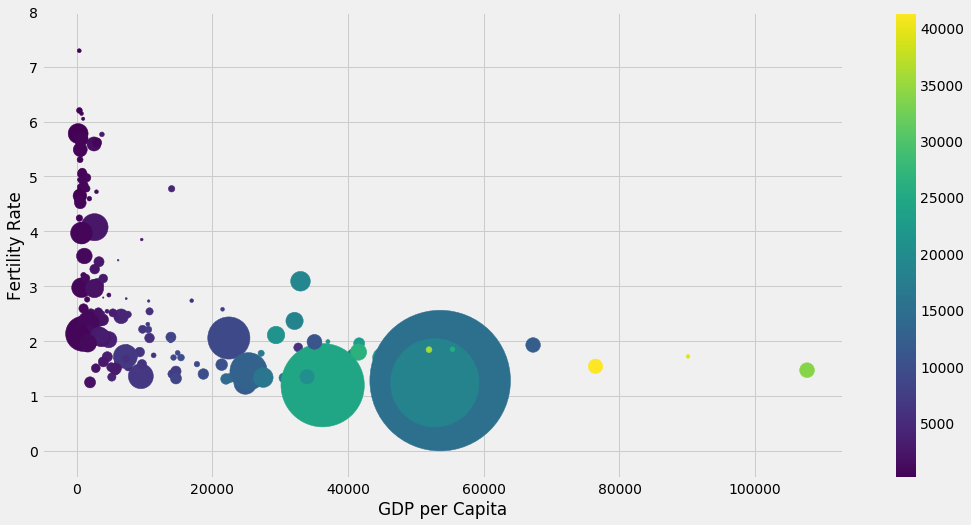

In [70]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))

plt.scatter(data2015['GDPperCapita'], data2015['FertilityRate'], 
            s = data2015['PopulationDensity'], c = data2015['HouseholdExpense']) 

plt.colorbar()
plt.ylim(-0.5,8)
plt.xlabel('GDP per Capita')
plt.ylabel('Fertility Rate')
plt.show()

### Merge all into one complete dataset

Merge the four imported tables into one such that each subject is one country-year pair, and the four measures are on four separate columns.

| country_id | year | fer | gdp | exp | pop |
|---|---|---|---|---|---|


In [62]:
data_fer_long = pd.read_csv("GooglePublicData_fer_long.csv")
data_gdp_long = pd.read_csv("GooglePublicData_gdp_long.csv")
data_exp_long = pd.read_csv("GooglePublicData_exp_long.csv")
data_pop_long = pd.read_csv("GooglePublicData_pop_long.csv")

In [63]:
data_fer_long.head()

,year,country_id,fer
0,1960,ABW,4.820
1,1961,ABW,4.655
2,1962,ABW,4.471
3,1963,ABW,4.271
4,1964,ABW,4.059


In [64]:
data_gdp_long.head()

,year,country_id,gdp
0,1960,ABW,NaN
1,1961,ABW,NaN
2,1962,ABW,NaN
3,1963,ABW,NaN
4,1964,ABW,NaN


In [65]:
data_all = pd.merge(left=data_fer_long, right=data_gdp_long, on=['country_id', 'year'])
data_all.head()

,year,country_id,fer,gdp
0,1960,ABW,4.820,NaN
1,1961,ABW,4.655,NaN
2,1962,ABW,4.471,NaN
3,1963,ABW,4.271,NaN
4,1964,ABW,4.059,NaN


In [66]:
data_all = pd.merge(left=data_all, right=data_exp_long, on=['country_id', 'year'])
data_all = pd.merge(left=data_all, right=data_pop_long, on=['country_id', 'year'])
data_all.head()

,year,country_id,fer,gdp,exp,pop
0,1960,ABW,4.820,NaN,NaN,NaN
1,1961,ABW,4.655,NaN,NaN,307.988889
2,1962,ABW,4.471,NaN,NaN,312.361111
3,1963,ABW,4.271,NaN,NaN,314.972222
4,1964,ABW,4.059,NaN,NaN,316.844444


#### Merge country info

In [67]:
data_country.head()

,country_id,country_name,income_level,latitude,longitude,region
0,AFG,Afghanistan,LIC,33.939110,67.709953,SAS
1,ALB,Albania,UMC,41.153332,20.168331,ECS
2,DZA,Algeria,UMC,28.033886,1.659626,MEA
3,ASM,American Samoa,UMC,-14.270972,-170.132217,EAS
4,AND,Andorra,NaN,42.546245,1.601554,ECS


In [68]:
data_all = pd.merge(left=data_all, right=data_country[['country_id', 'income_level', 'region']], on='country_id')
data_all.head()

,year,country_id,fer,gdp,exp,pop,income_level,region
0,1960,ABW,4.820,NaN,NaN,NaN,NaN,LCN
1,1961,ABW,4.655,NaN,NaN,307.988889,NaN,LCN
2,1962,ABW,4.471,NaN,NaN,312.361111,NaN,LCN
3,1963,ABW,4.271,NaN,NaN,314.972222,NaN,LCN
4,1964,ABW,4.059,NaN,NaN,316.844444,NaN,LCN


#### Save the complete dataset for future use

In [69]:
data_all.to_csv("GooglePublicData_all.csv", index=False)